# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import stop_words
import pickle
import warnings; warnings.simplefilter('ignore')

In [2]:
X = pd.read_csv('../Data/X.csv',index_col=0)
y = pd.read_csv('../Data/y.csv',index_col=0)

Count Vectorizer goes through every post, and for ever word separated by punctuation, it creates a column, and assigns the resulting cell the integer that corresponds to the amount each word appears in each post

In [3]:
CV = CountVectorizer(stop_words='english',min_df=5)
X_CV = CV.fit_transform(X["Total_text"])

In [4]:
df = pd.DataFrame(X_CV.toarray(), columns=CV.get_feature_names())
df['reddit_target'] = list(y['subreddit'])

The Output in the cell below is the list of the top 15 most common words for the email reddit, and how often they appear in our corpus, except for reddit_target which should be ignored, as it is our target variable, and not part of our NLP analysis.

In [5]:
df[df["reddit_target"] == 2].sum().sort_values(ascending=False).head(15)

email            2017
reddit_target    1804
emails            722
com               484
mail              382
like              366
gmail             336
send              324
account           323
use               310
gt                295
spam              292
address           289
just              260
ve                259
dtype: int64

The Output in the cell below is the list of the top 15 most common words for the SEO reddit, and how often they appear in our corpus, except for reddit_target, which should be ignored, as it is our target variable, and not part of our NLP analysis.

In [6]:
df[df["reddit_target"] == 1].sum().sort_values(ascending=False).head(15)

seo              663
reddit_target    643
google           432
site             374
website          373
page             355
content          265
com              224
like             215
amp              211
just             200
search           200
pages            189
new              178
ve               172
dtype: int64

The Output in the cell below is the list of the top 15 most common words for the PPC reddit, and how often they appear in our corpus

In [7]:
df[df["reddit_target"] == 0].sum().sort_values(ascending=False).head(15)

ads          853
ad           597
google       594
facebook     493
campaign     445
adwords      429
campaigns    320
like         308
ve           292
just         291
page         270
account      262
new          251
ppc          245
search       243
dtype: int64

Using the information above, I decided to add the words com and ve to my list of stopwords. because I believe that they offer no additional information to help my models.

In [8]:
custom_stop_words = list(stop_words.ENGLISH_STOP_WORDS)
additional_stop_words = ['com','ve','just']
custom_stop_words = custom_stop_words + additional_stop_words

This cell is preparing the data to show the top 15 used words for each subreddit in a barplot

In [9]:
df.drop(columns=additional_stop_words,inplace=True)
ppc = df[df["reddit_target"] == 0].sum().sort_values(ascending=False).head(15)
seo = df[df["reddit_target"] == 1].sum().sort_values(ascending=False).head(16)
seo.drop(labels="reddit_target",inplace=True)
email = df[df["reddit_target"] == 2].sum().sort_values(ascending=False).head(16)
email.drop(labels="reddit_target",inplace=True)

Text(0.5,1,'PPC Top 15 Words')

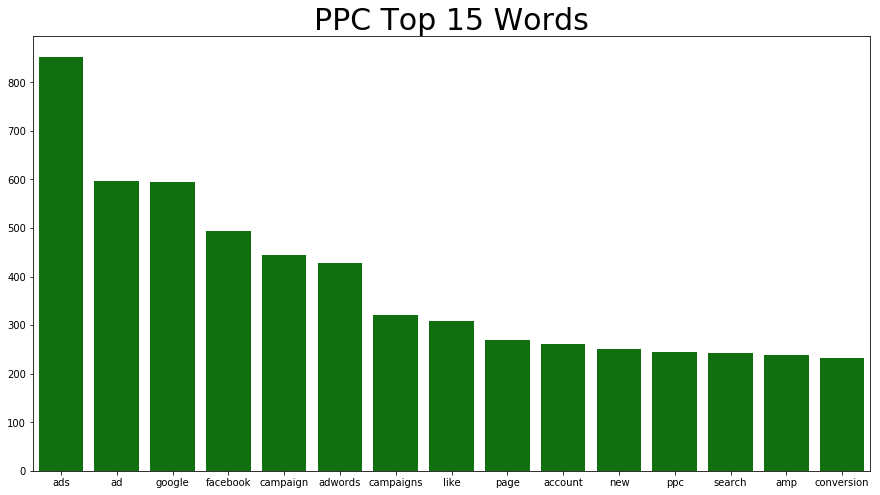

In [10]:
f,ax = plt.subplots(figsize=(15,8))
sns.barplot(x=ppc.index,y=ppc.values, ax=ax,color='green')
plt.title("PPC Top 15 Words",fontsize=30)

Text(0.5,1,'SEO Top 15 Words')

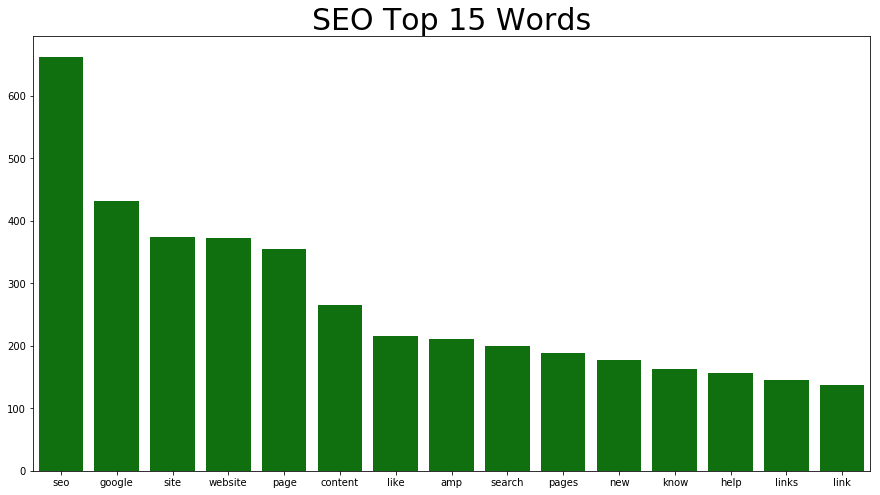

In [11]:
f,ax = plt.subplots(figsize=(15,8))
sns.barplot(x=seo.index,y=seo.values, ax=ax,color='green')
plt.title("SEO Top 15 Words",fontsize=30)

Text(0.5,1,'Email Top 15 Words')

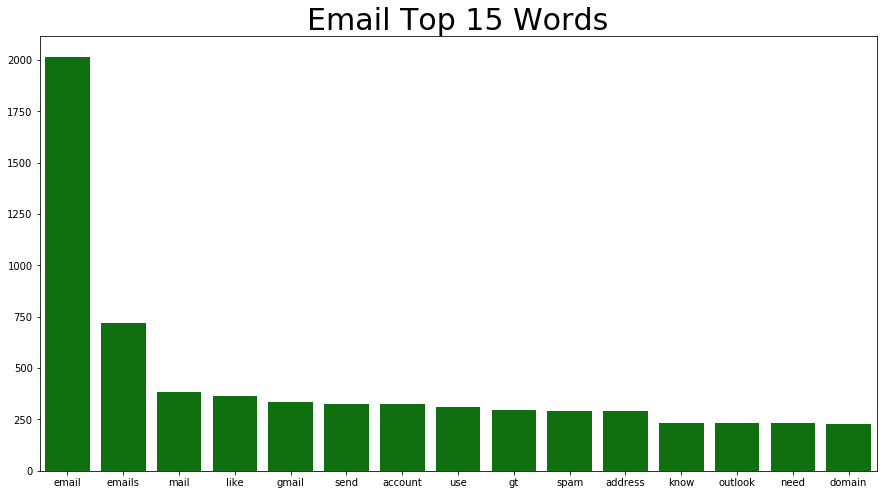

In [12]:
f,ax = plt.subplots(figsize=(15,8))
sns.barplot(x=email.index,y=email.values, ax=ax,color='green')
plt.title("Email Top 15 Words",fontsize=30)

###### This cell saves my custom stop words list to be used when processing our data

In [13]:
with open('../Assets/custom_stop_words.pkl','wb+') as f:
    pickle.dump(custom_stop_words,f)